# Derivation of FRET and S correction formulas

*Antonino Ingargiola*  -- tritemio AT gmail.com <br>
**ORCID** [0000-0002-9348-1397](orcid.org/0000-0002-9348-1397) <br>
**twitter** [@tritemio_sc](https://twitter.com/tritemio_sc) <br>

Last updated: May 2016

# Abstract

<p class='lead'>
In this notebook I derive correction formulas (and their inverse) for $E$ and $S$ in μs-ALEX measurements. I also define the A-direct excitation as a function of different 
observable, derive their expression as a function of physical parameters 
and discuss their interpretation.
The expressions here derived (direct excitation, E correction formula) 
are valid for any smFRET measurements (freely diffusing or immobilized). The main reference is 
(<a href="http://www.ncbi.nlm.nih.gov/pmc/articles/PMC1282518/" target="_blank">Lee, BJ 2005</a>,
<a href="http://www.chem.ucla.edu/~michalet/papers/BJ2005.pdf" target="_blank">PDF</a>,
<a href="http://www.chem.ucla.edu/~michalet/papers/BJ2005SI.pdf" target="_blank">SI</a>). 
Beyond what reported in 
(<a href="http://www.ncbi.nlm.nih.gov/pmc/articles/PMC1282518/" target="_blank">Lee, BJ 2005</a>), 
here I derive a more complete set of expressions together 
with their physical interpretation that was incomplete in the original publication.
The algebraic part is performed through 
<a href="http://en.wikipedia.org/wiki/Computer_algebra_system" target="_blank">Computer-assisted symbolic computation</a>
using 
<a href="http://sympy.org/en/index.html" target="_blank">Sympy</a>
for proof of correctness.
</p>

## Revisions
- Oct 19, 2016:
    - Simplify notation: remove subscript $dir$ from $d$ coefficients
    - Fix typo in $\gamma$ definition
- May 27, 2016: 
    - Reword abstract and other paragraphs.
    - Fix typo in $d_{T}$ physical definition
- May 16, 2016: 
    - Use a notation more similar to ([Lee, BJ 2005](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC1282518/))
    - Fix typo in $d_{A}$ definition (definition 5)
    - Derive formula for $S = f(E_R, S_R)$
- Oct 09, 2014: Added expressions for $S$
- Aug 05, 2014: public release

# 1. Definitions

## Physical parameters

We start defining the signal (e.g. the corrected counts in each channel):

$$n_d = I_{D_{ex}} \, \sigma_{D_{ex}}^D \,
\phi_D \, \eta_{D_{det}}^{D_{em}} \, (1-E)$$

$$n_a = I_{D_{ex}} \, \sigma_{D_{ex}}^D \,
\phi_A \, \eta_{A_{det}}^{A_{em}} \, E$$

$$ n_{aa} = I_{A_{ex}} \, \sigma_{A_{ex}}^A \,
\phi_A \, \eta_{A_{det}}^{A_{em}}$$

$$n_a^* = n_a + Lk + Dir$$

where

$$Lk = I_{D_{ex}} \, \sigma_{D_{ex}}^D \,
\phi_D \, \eta_{A_{det}}^{D_{em}} \, (1-E)$$

$$Dir = I_{D_{ex}} \, \sigma_{D_{ex}}^A \,
\phi_A \, \eta_{A_{det}}^{A_{em}}$$

$$\gamma = \frac{\phi_A\,\eta_{A_{det}}^{A_{em}}}{\phi_D\,\eta_{D_{det}}^{D_{em}}}$$

$$ \beta = \frac{I_{A_{ex}}\sigma_{A_{ex}}^A}{I_{D_{ex}}\sigma_{D_{ex}}^D}$$

The last quantity, $\beta$, is obtained when fitting the gamma factor from the
$S_R$ of a series of static samples ([Lee, BJ 2005](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC1282518/)).

## Ratiometric quantities

Let define the FRET efficiency $E$ and the proximity ratios $E_{PR}$ and $E_R$:

$$ E = \frac{n_a}{n_a +  \gamma \, n_d} \qquad E_R = \frac{n^*_a}{n^*_a +  n_d}
\qquad E_{PR} = \frac{n_a}{n_a +  n_d}$$

where $n_d$, $n_a$ are the donor and acceptor detected counts after all 
the corrections, while $n^*_a$ is the acceptor counts with only background 
correction (no leakage and direct excitation corrections).

Similarly, the definitions of uncorrected stoichiometry ($S_R$ and $S_{PR}$)
and corrected stoichiometry ($S$) are:

$$ S_{R}  = \frac{n_d + n^*_a}{n_d + n^*_a + n_{aa}}  \qquad 
S_{PR}  = \frac{n_d + n_a}{n_d + n_a + n_{aa}}  \qquad 
S  = \frac{\gamma n_d + n_a}{\gamma n_d + n_a + n_{aa}}$$ 

The relation between $n_a$ and $n^*_a$ is:

$$n^*_a = n_a + Lk + Dir$$

## Direct Acceptor Excitation

The term $Dir$ can be equivalently expressed as:

1) a function of $n_{aa}$:

   $$  Dir = d_{AA} \cdot n_{aa}$$

2) a function of the "corrected total signal" $(n_a + \gamma\,n_d)$:

   $$ Dir = d_{T} \cdot (n_a + \gamma\,n_d) $$
   
3) a function of the "corrected total signal divided by $\gamma$" $(n_a/\gamma + n_d)$:

   $$ Dir = d_{T'} \cdot (n_a/\gamma + n_d) $$

4) a function of $n_d$:

   $$ Dir = d_{D} \cdot n_d $$

5) a function of $n_a$:

   $$ Dir = d_{A} \cdot n_a $$

### Def. 1
The coefficient $d_{AA}$ can be computed from an acceptor-only population 
in ALEX measurement as:

$$ d_{AA} = \frac{Dir}{n_{aa}} $$

$$Dir = I_{D_{ex}} \, \sigma_{D_{ex}}^A \,
\phi_A \, \eta_{A_{det}}^{A_{em}}$$

In terms of physical parameters it is:

$$ d_{AA} = \frac{I_{D_{ex}}}{I_{A_{ex}}} \frac{\sigma_{D_{ex}}^A}{\sigma_{A_{ex}}^A} $$

> **NOTE:** This coefficient is $d$ in [Lee, BJ 2005](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC1282518/).

### Def. 2

From the definition, it follows that:

$$ d_{T} = \frac{Dir}{n_a + \gamma\, n_d} $$

$$n_a = I_{D_{ex}} \, \sigma_{D_{ex}}^D \,
\phi_A \, \eta_{A_{det}}^{A_{em}} \, E$$

To derive the expression of $d_{T}$ as a function of physical parameters,
consider the case of 100% FRET molecule. In this case $n_d = 0$ and we obtain:

$$ d_{T} = \frac{\sigma_{D_{ex}}^A}{\sigma_{D_{ex}}^D} $$

Now note that for $E < 1$, if $\gamma$ is fixed, the "corrected total signal"
(i.e. the corrected burst size in freely-diffusing measurements)
$n_a + \gamma\, n_d$ will not change for any $E < 1$. Therefore the 
previous expression is valid for any $E$.

Note that we can express $d_{T}$ as the product of $\beta$ and $d_{AA}$ (def. 1):

$$ d_{T} = \beta \, d_{AA}$$

This relation follows from the definition of $\beta$ reported in the previous section 
and originally defined in ([Lee, BJ 2005](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC1282518/)).

### Def. 3
The coefficient $d_{T'}$ can be obtained from the $d_{T}$ expression
noting that we simply divide the "corrected total signal" by $\gamma$:

$$ d_{T'} = \frac{\sigma_{D_{ex}}^A}{\sigma_{D_{ex}}^A} \gamma$$

> **NOTE:** The coefficient $d_{T'}$ is $d'$ in [Lee, BJ 2005](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC1282518/) paper ([p. 2943](http://www.chem.ucla.edu/~michalet/papers/BJ2005.pdf)) and [SI](http://www.chem.ucla.edu/~michalet/papers/BJ2005SI.pdf). 
In fact, the definition of $d'$ given in eq. (27) of
[Lee, BJ 2005](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC1282518/)
involves a $E=0$ population, for which $n_d + n_a/\gamma = n_d$.



### Def. 4
The coefficient $d_{D}$ is a function of $E$ as well as the physical parameters.
Taking the ratio of the physical definitions of $Dir$ and $n_d$ we obtain:

$$ d_{D} = \frac{\sigma_{D_{ex}}^A}{\sigma_{D_{ex}}^A} \frac{\gamma}{1 - E} = d_{T} \frac{\gamma}{1 - E} $$

### Def. 5
The coefficient $d_{A}$ is a function of $E$ as well as the physical parameters.
Taking the ratio of the physical definitions of $Dir$ and $n_a$ we obtain:

$$ d_{A} = \frac{\sigma_{D_{ex}}^A}{\sigma_{D_{ex}}^D} \frac{1}{E} $$

### Discussion of "Def. 1-5"

Definitions 4 and 5 are inconvenient because the coefficient depends on $E$. "Def. 3" does not depend on $E$ but depends on $\gamma$, while "Def. 2" depends only on the ratio of two absorption cross sections and is therefore the most general form. "Def. 1" can only be used in an ALEX measurement but it is easy to fit from the $S$ value of the A-only population.

So, for non-ALEX measurement, "Def. 2" ($d_{T}$) gives the simplest and most general coefficient. It can be computed from datasheet values or from $d_{AA}$ estimated 
from an ALEX measurement using the same dyes pair and D-excitation wavelength 
($d_{T} = \beta\, d_{AA}$).

As physical interpretation, definitions 2 and 3 are similar. In "Def. 2", when $E=1$, the "corrected total signal" is $n_a$. When $E < 1$, the "corrected total signal" do not change (at the same excitation intensity, and fixed $\gamma$): they are the sum of acceptor and $\gamma$-corrected donor counts. Similar considerations hold for "Def. 3" (starting from $E=0$).

# Correcting E

In [1]:
import sympy
from sympy import init_printing, symbols, solve, Eq
init_printing()  # beautiful maths

## Define the symbols

In [2]:
E, Er, Epr = symbols('E, E_R, E_PR')
S, Sr, Spr = symbols('S, S_R, S_PR')
nd, na, ns_a, n_dir, naa, nt = symbols('n_d n_a n^*_a n_dir n_aa n_t')
gamma, Lk = symbols('gamma L_k')
d_exAA, d_exT, d_exD = symbols("d_dirAA d_dirT, d_dirD")

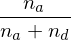

In [3]:
def PR(nd, na):
    return na/(na + nd)

PR(nd, na)

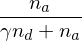

In [4]:
def FRET(nd, na, gamma):
    return na / (na + gamma*nd)

FRET(nd, na, gamma)

## Computing E from RAW values

As a first step we write $n^*_a$ as a function of $n_a$ and save the symbolic expression:

In [5]:
ns_a_as_func_na = na + Lk*nd + n_dir
ns_a_as_func_na

Here we write the PR substituting $n^*_a$ with $n_a + L_k\, n_d + Dir$ and $Dir$ with the "Def. 2" expression:

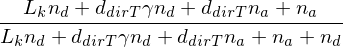

In [6]:
Er_sym = sympy.factor(PR(nd, ns_a).subs(ns_a, ns_a_as_func_na).subs(n_dir, d_exT*(nd*gamma + na)))
Er_sym

The previous expression is the proximity ratio $E_R$. We "solve" it to obtain $n_d$ as a function of $E_R$. Then we replace the obtained expression in the FRET formula:

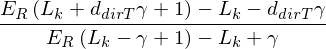

In [7]:
E_func_Er = sympy.factor(FRET(nd, na, gamma).subs(nd, solve(Er_sym - Er, nd)[0])).collect(Er)
E_func_Er

In [8]:
print(sympy.printing.latex(E_func_Er))

\frac{E_{R} \left(L_{k} + d_{dirT} \gamma + 1\right) - L_{k} - d_{dirT} \gamma}{E_{R} \left(L_{k} - \gamma + 1\right) - L_{k} + \gamma}


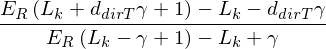

In [9]:
E_func_Er

The previous expression is $E$ as a function of $E_R$, including gamma, leakage and direct excitation coefficients. It is the same of [equation S9](http://www.chem.ucla.edu/~michalet/papers/BJ2005SI.pdf) when we replace $d_{exT}\gamma$ with $d'$.

From this symbolic expression we can define the python function:

In [10]:
print(E_func_Er)

(E_R*(L_k + d_dirT*gamma + 1) - L_k - d_dirT*gamma)/(E_R*(L_k - gamma + 1) - L_k + gamma)


In [11]:
def correct_E_gamma_leak_dir(E_R, gamma, L_k=0, d_dirT=0):
    E_R = np.asarray(E_R)
    return ((E_R*(L_k + d_dirT*gamma + 1) - L_k - d_dirT*gamma) / 
            (E_R*(L_k - gamma + 1) - L_k + gamma))

In case we want to compute $E$ using the coefficient $d_{AA}$ 
for direct excitation (as obtained from ALEX measurements) we
simply replace the relation:

$$ d_{T} = \beta\, d_{AA}$$ 

in the previous expression.

Now we can derive the simpler expression in the case we want to correct only one parameter.

For only gamma correction we obtain:

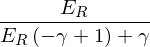

In [12]:
E_func_Er.subs(Lk, 0).subs(d_exT, 0)

For the only leakage correction we obtain:

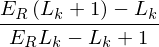

In [13]:
sympy.collect(E_func_Er.subs(gamma, 1).subs(d_exT, 0), Er)

For the only direct excitation correction we obtain:

In [14]:
sympy.collect(E_func_Er.subs(gamma, 1).subs(Lk, 0), Er)

> **NOTE:** The latter 3 formulas for correcting only one coefficient cannot be chained. In other words, applying them in sequence **do not** yield the same result as applying the complete formula.

## Computing RAW values from E

Conversely, to compute $E_R$  as a function of $E$ we invert the previous expression:

In [15]:
Er_func_E = solve(E - E_func_Er, Er)[0]

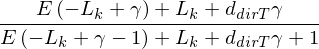

In [16]:
sympy.collect(Er_func_E, E)

And we define the python function:

In [17]:
print(sympy.collect(Er_func_E, E))

(E*(-L_k + gamma) + L_k + d_dirT*gamma)/(E*(-L_k + gamma - 1) + L_k + d_dirT*gamma + 1)


In [18]:
def uncorrect_E_gamma_leak_dir(E, gamma, L_k=0, d_dirT=0):
    E = np.asarray(E)
    return ((E*(-L_k + gamma) + L_k + d_dirT*gamma) /
            (E*(-L_k + gamma - 1) + L_k + d_dirT*gamma + 1))

And the inverse for only a single correction are (in the order gamma, leakage, direct excitation)

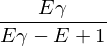

In [19]:
Er_func_E.subs(Lk, 0).subs(d_exT, 0)

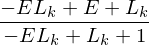

In [20]:
sympy.collect(Er_func_E.subs(gamma, 1).subs(d_exT, 0), Er)

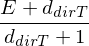

In [21]:
sympy.collect(Er_func_E.subs(gamma, 1).subs(Lk, 0), Er)

# Correcting S

In this section we derive the expression of $S$ (corrected stoichiometry) 
as a function of $S_{PR}$ or $S_R$ (uncorrected stoichiometry). 
See section 1 for the expression of $S$ and $S_R$ and $S_{PR}$. 

## Define the symbols

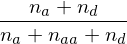

In [22]:
def StoichRaw(nd, na, naa):
    return (na + nd)/(na + nd + naa)

StoichRaw(nd, na, naa)

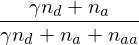

In [23]:
def Stoich(nd, na, naa, gamma):
    return (na + gamma*nd)/(na + gamma*nd + naa)

Stoich(nd, na, naa, gamma)

## Computing S from RAW values

As a first step we write $n^*_a$ as a function of $n_a$ and save the symbolic expression:

In [24]:
ns_a_as_func_na = na + Lk*nd + n_dir
ns_a_as_func_na

Here we write $S_R$ substituting $n^*_a$ with $n_a + L_k n_d + Dir$ and 
$Dir$ with $d_{T}(n_a + \gamma\,n_d)$ (Definition 2):

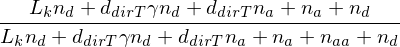

In [25]:
Sr_sym = sympy.factor(
    StoichRaw(nd, ns_a, naa).subs(ns_a, ns_a_as_func_na).subs(n_dir, d_exT*(na + gamma*nd))
    )
Sr_sym

The previous expression is $S_R$. We can use it to express
$n_a$ as a function of $S_R$ and $n_d$:

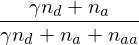

In [26]:
S_sym = Stoich(nd, na, naa, gamma)
S_sym

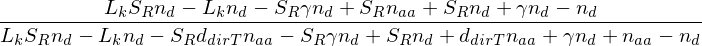

In [27]:
S_func_Sr_nx = S_sym.subs(na, solve(Sr_sym - Sr, na)[0]).factor()
S_func_Sr_nx

The previous expression if $S$ as a function of $S_R$, $n_d$, $n_a$,
$n_{aa}$ and correction coefficients.

Now we use the expression of $E$ to try to eliminate 
$n_d$, $n_a$ and $n_{aa}$
from the previous expression:

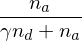

In [28]:
E_sym = FRET(nd, na, gamma)
E_sym

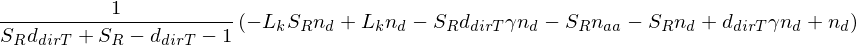

In [29]:
na_func_Sr = solve(Sr_sym - Sr, na)[0]
na_func_Sr

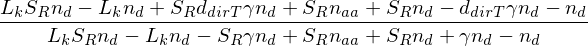

In [30]:
E_func_Sr = E_sym.subs(na, na_func_Sr).factor()
E_func_Sr

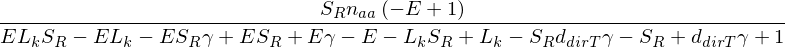

In [31]:
nd_func_E_Sr = solve(E_func_Sr - E, nd)[0]
nd_func_E_Sr

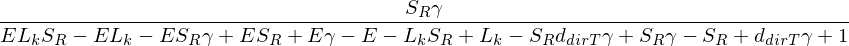

In [32]:
S_func_E_Sr = S_func_Sr_nx.replace(nd, nd_func_E_Sr).factor()
S_func_E_Sr

Note that in the previous expression there is no more
dependency on $n_{aa}$ (we have not eliminated the variable,
it simply simplifies).

The previous expression is $S$ as a function of $S_{R}$, $E$ 
(gamma corrected) and all correction coefficients.

Let's replace $E$ with $E_{R}$:

In [33]:
ns_a_as_func_na

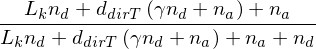

In [34]:
Er_sym = PR(nd, ns_a).subs(ns_a, ns_a_as_func_na).subs(n_dir, d_exT*(nd*gamma + na))
Er_sym

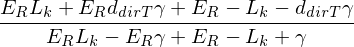

In [35]:
E_func_Er = FRET(nd, na, gamma).subs(nd, solve(Er_sym - Er, nd)[0]).factor()
E_func_Er

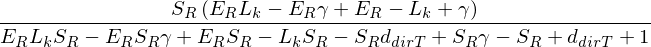

In [36]:
S_func_Er_Sr = S_func_E_Sr.replace(E, E_func_Er).factor()
S_func_Er_Sr 

In [37]:
print(sympy.printing.latex(S_func_Er_Sr))

\frac{S_{R} \left(E_{R} L_{k} - E_{R} \gamma + E_{R} - L_{k} + \gamma\right)}{E_{R} L_{k} S_{R} - E_{R} S_{R} \gamma + E_{R} S_{R} - L_{k} S_{R} - S_{R} d_{dirT} + S_{R} \gamma - S_{R} + d_{dirT} + 1}


The previous expression is $S$ as a function of $S_{R}$, $E_{R}$ and 
all correction coefficients.

Let's make a python function out of it:

In [38]:
print(S_func_Er_Sr)

S_R*(E_R*L_k - E_R*gamma + E_R - L_k + gamma)/(E_R*L_k*S_R - E_R*S_R*gamma + E_R*S_R - L_k*S_R - S_R*d_dirT + S_R*gamma - S_R + d_dirT + 1)


In [39]:
def correct_S(E_R, S_R, gamma, L_k, d_dirT):
    return (S_R*(E_R*L_k - E_R*gamma + E_R - L_k + gamma) /
            (E_R*L_k*S_R - E_R*S_R*gamma + E_R*S_R - L_k*S_R - S_R*d_dirT + 
             S_R*gamma - S_R + d_dirT + 1))

If we want to express $S$ as a function of $S_{PR}$ (i.e. the
stoichiometry with leakage and direct excitation correction),
we just set $L_k = 0$ and $d_{T} = 0 $ in the previous expression.

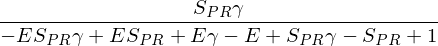

In [40]:
S_func_E_Spr = (S_func_E_Sr.replace(Lk, 0).replace(d_exT, 0)
                .replace(Sr, Spr).replace(Er, Epr))
S_func_E_Spr

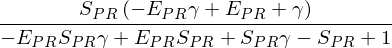

In [41]:
S_func_Epr_Spr = (S_func_Er_Sr.replace(Lk, 0).replace(d_exT, 0)
                  .replace(Sr, Spr).replace(Er, Epr))
S_func_Epr_Spr

## Computing RAW values from S

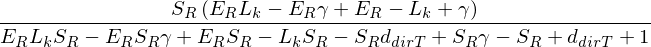

In [42]:
S_func_Er_Sr

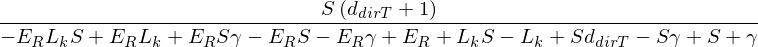

In [43]:
Sr_func_Er_S = solve(S_func_Er_Sr - S, Sr)[0]
Sr_func_Er_S

In [44]:
print(Sr_func_Er_S)

S*(d_dirT + 1)/(-E_R*L_k*S + E_R*L_k + E_R*S*gamma - E_R*S - E_R*gamma + E_R + L_k*S - L_k + S*d_dirT - S*gamma + S + gamma)


In [45]:
def uncorrect_S(E_R, S, gamma, L_k, d_dirT):
    return (S*(d_dirT + 1) / 
            (-E_R*L_k*S + E_R*L_k + E_R*S*gamma - E_R*S - E_R*gamma + 
             E_R + L_k*S - L_k + S*d_dirT - S*gamma + S + gamma))

# Numerical tests

Test consistency between apply and un-apply of numerical corrections for $E$.

In [46]:
import numpy as np

In [47]:
Ex = np.arange(-0.2, 1.2, 0.1)

In [48]:
gamma_ = 0.75
leakage_ = 0.04
dir_ex_t_ = 0.08

In [49]:
Ex_roundtrip = uncorrect_E_gamma_leak_dir(correct_E_gamma_leak_dir(Ex, gamma_), gamma_)

In [50]:
np.allclose(Ex, Ex_roundtrip)

True

In [51]:
Ex_roundtrip = uncorrect_E_gamma_leak_dir(correct_E_gamma_leak_dir(Ex, gamma_, leakage_, dir_ex_t_), 
                                          gamma_, leakage_, dir_ex_t_)

In [52]:
np.allclose(Ex, Ex_roundtrip)

True

In [53]:
Ex_roundtrip = correct_E_gamma_leak_dir(uncorrect_E_gamma_leak_dir(Ex, gamma_, leakage_, dir_ex_t_), 
                                        gamma_, leakage_, dir_ex_t_)

In [54]:
np.allclose(Ex, Ex_roundtrip)

True

Test that $S$ correction functions:

In [55]:
Ex = np.arange(-0.2, 1.2, 0.01)
Sx = np.arange(-0.2, 1.2, 0.01)

In [56]:
np.random.shuffle(Ex)
np.random.shuffle(Sx)

Let's do a consistency check:

In [57]:
gamma_ = 1
leakage_ = 0
dir_ex_t_ = 0

S_corr = correct_S(Ex, Sx, gamma_, leakage_, dir_ex_t_)
S_uncorr = uncorrect_S(Ex, S_corr, gamma_, leakage_, dir_ex_t_)

In [58]:
np.allclose(S_corr, Sx)

True

In [59]:
np.allclose(S_uncorr, Sx)

True

In [60]:
gamma_ = 0.7
leakage_ = 0.05
dir_ex_t_ = 0.1

S_corr = correct_S(Ex, Sx, gamma_, leakage_, dir_ex_t_)
S_uncorr = uncorrect_S(Ex, S_corr, gamma_, leakage_, dir_ex_t_)

In [61]:
np.allclose(S_uncorr, Sx)

True

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

In [63]:
idx = Sx.argsort()

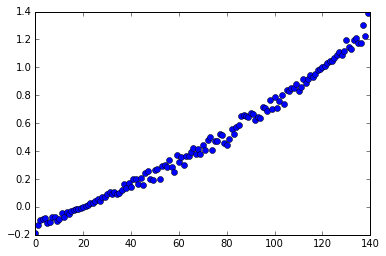

In [64]:
plt.plot(S_corr[idx], 'o')